In [1]:
from omega_a_fitting import *

Welcome to JupyROOT 6.12/06


In [2]:
fitFunc = WiggleFit("hello there!", "5par")
h = r.TH1D("g","g",100,100,1000)
#fitFunc.initializeKloss(h)

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [3]:
fitFunc([0],[2+x for x in range(18)])

-5.681362293202928

In [4]:
fit = BuildTF1(fitFunc, 5, "5par", "five_parameter_fit", 30, 200)
fit.SetParameters([10000,64.4,0.33,0,0])
fit.SetParNames()

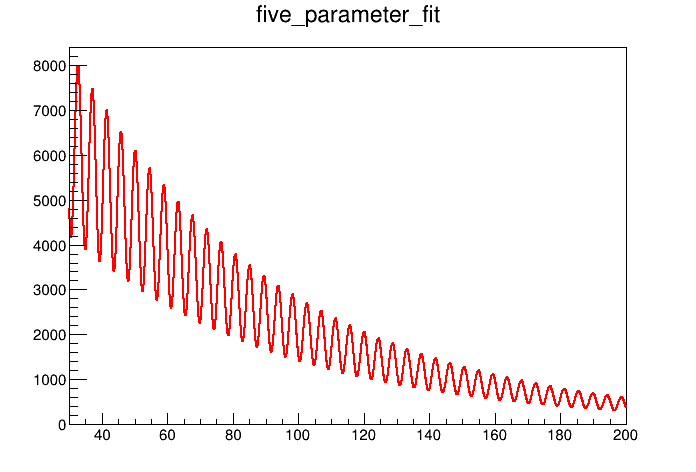

In [5]:
c = r.TCanvas()
fit.f.Draw()
c.Draw()

In [6]:
h = r.TH1D("h","h",1000,30,200)
for i in range(h.GetNbinsX()):
    h.SetBinContent(i, fit.f.Eval(h.GetBinCenter(i) + 1 ))

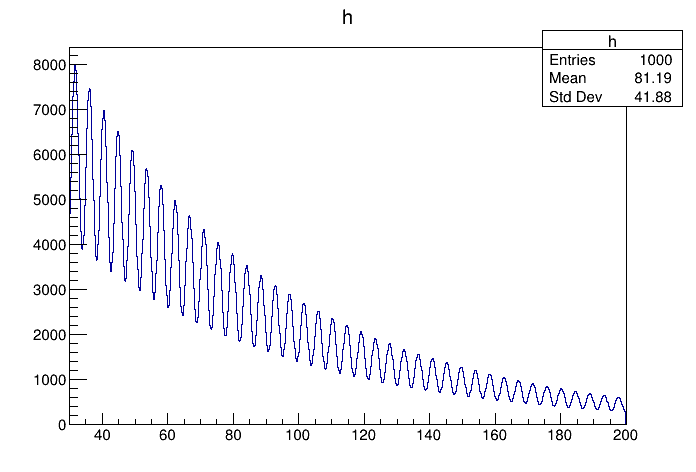

In [7]:
c = r.TCanvas()
h.Draw()
c.Draw()

In [8]:
fitter = WiggleFitter(h, fit, "5par", "R", 2)

In [9]:
fitter.Fit(2)

N  =  9845.92151741577 +/- 14.72485328507123
#tau_{#mu}  =  64.3999914994247 +/- 0.06814185642207643
A  =  0.32999998474833797 +/- 0.0009258261270261102
R  =  -0.0011003834711918736 +/- 47.4660918525278
#phi_{a}  =  7.722635657910204 +/- 0.006271247246990391
N  =  9845.92150370273 +/- 14.559436770099909
#tau_{#mu}  =  64.3999924732034 +/- 0.06711348451604486
A  =  0.3299999928295961 +/- 0.0009235507733099264
R  =  -0.002439755701123313 +/- 47.40226802592347
#phi_{a}  =  7.722635439260343 +/- 0.006227152381172126
 FCN=3.52209e-08 FROM MIGRAD    STATUS=CONVERGED     269 CALLS         270 TOTAL
                     EDM=4.12517e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   4.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            9.84592e+03   1.47249e+01   5.61995e-03   1.09122e-06
   2  #tau_{#mu}   6.44000e+01   6.81419e-02  -4.99728e-05  -3.64516e-03
   3  A           

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


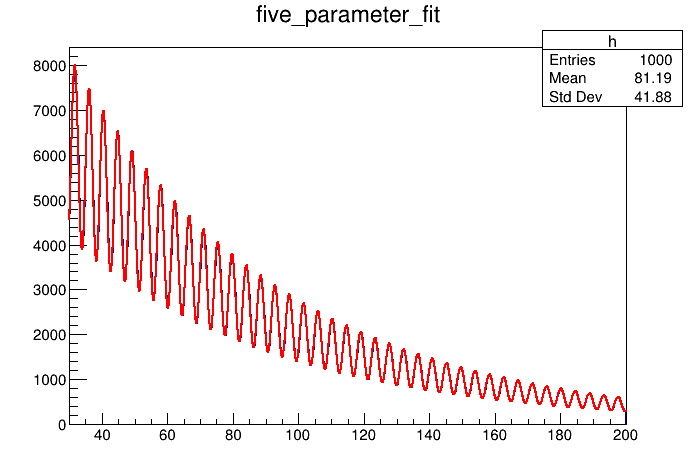

In [10]:
c = r.TCanvas()
fitter.f.Draw()
fitter.h.Draw("SAME")
c.Draw()

In [11]:
print(fitter.f.GetName())
print(fitter.nPar)

5par_fitter
5


In [12]:
fitter.f

<ROOT.TF1 object ("5par_fitter") at 0x7fffd41d50d0>

In [13]:
fitter.resid

<ROOT.TH1D object ("h_resid_5par_fitter") at 0x7fffd429ea00>

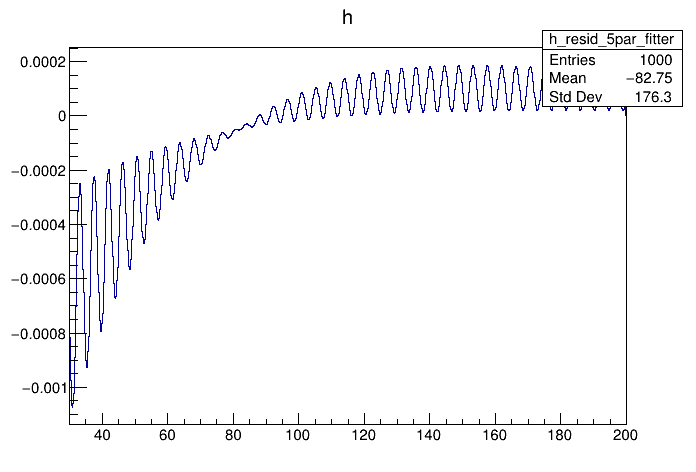

In [14]:
c = r.TCanvas()
fitter.resid.Draw()
c.Draw()

In [15]:
fitter.ComputeFFT()

1000
999 [(30.085, -0.0008155263703883975), (30.255000000000003, -0.0009030470509969746), (30.425, -0.0009765797867657966), (30.595000000000002, -0.0010317071610188577), (30.765, -0.0010651572220012895)]
999 169.66000000000003 30.000085085085086 199.66008508508511
0.16982982982982986 0.005894141223623717
11.776494164800187 5.888247082400093


In [16]:
fitter.fft

<ROOT.TH1D object ("out_MAG P") at 0x7fffd447ef90>

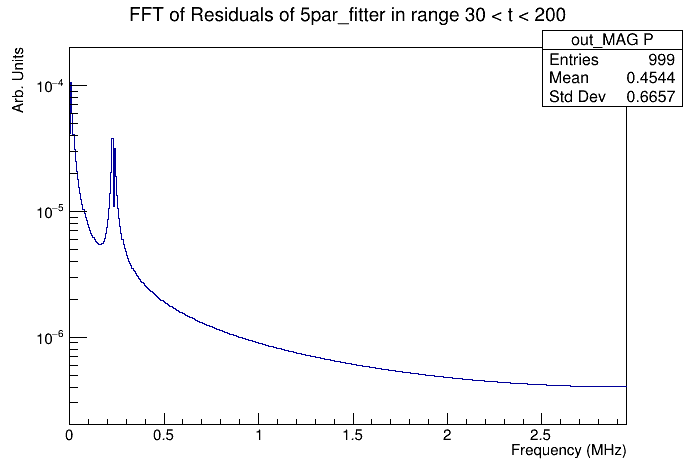

In [17]:
c = r.TCanvas()
fitter.fft.Draw("hist")
c.SetLogy()
c.Draw()

In [56]:
fitter.kloss

AttributeError: 'WiggleFitter' object has no attribute 'kloss'